# Programming Assignment B

*Forest Fire*

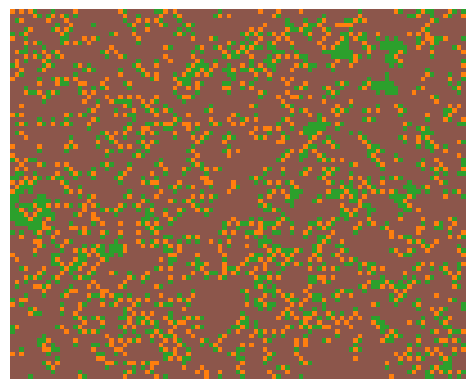

KeyboardInterrupt: 

In [5]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import clear_output

import time
from enum import Enum

States = Enum('States', [('Ashes', 0.55), ('Tree', 0.25), ('Fire', 0.15)])

# grid = np.random.choice([States.Ashes.value, States.Tree.value, States.Fire.value], size=(82, 101))
grid = np.full((82, 101), States.Ashes.value)
running = True

def neighborhood(grid, x, y):
    return [
        grid[x, y - 1],
        grid[(x + 1) % grid.shape[0], y],
        grid[x, (y + 1) % grid.shape[1]],
        grid[x - 1, y]
    ]


def update(grid, p, q, f):
    new_grid = grid.copy()

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):

            old_state = States(grid[i, j])
            
            if old_state == States.Fire:
                new_grid[i, j] = States.Ashes.value

            elif old_state == States.Ashes:
                if (
                    rand() < p  # spontaneous growth
                    or (rand() < q and States.Tree.value in neighborhood(grid, i, j))  # induced growth
                ):
                    new_grid[i, j] = States.Tree.value

            else:  # old_state == States.Tree
                if (
                    rand() < f  # spontaneous fire
                    or States.Fire.value in neighborhood(grid, i, j)  # induced fire
                ):
                    new_grid[i, j] = States.Fire.value

    return new_grid


def input_or_default(message, default):
    try:
        return float(input(message))
    except ValueError:
        return default
    

defaults = [0.001, 0.5, 0.0001]
spon_growth = input_or_default(f"Choose p (prob. of spontaneous growth, e.g. {defaults[0]}): ", defaults[0])
ind_growth = input_or_default(f"Choose q (prob. of induced growth, e.g. {defaults[1]}): ", defaults[1])
spon_fire = input_or_default(f"Choose f (prob. of spontaneous fire, e.g. {defaults[2]})", defaults[2])

while running:
    clear_output(wait=True)
    # print(f"Parameters: p={spon_growth}, q={ind_growth}, f={spon_fire}")
    plt.imshow(grid, cmap='tab10', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    grid = update(grid, spon_growth, ind_growth, spon_fire)
    time.sleep(.1)


In [2]:
float("")

ValueError: could not convert string to float: ''